<span style="color:#D35400">**Importing Libraries**</span>

---



In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
import pickle
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import Ridge

<span style="color:#D35400">**Mounting Data**</span>

---



In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Project 1 - Covid Vaccination/Project 1 - Covid Vaccination/country_vaccinations.csv', parse_dates = ["date"])

<span style="color:#D35400">**EDA**</span>

---



In [5]:
data.sample(5)

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
28424,28424,Tonga,TON,2021-04-22,0.0,NaN,NaN,NaN,425.0,NaN,NaN,NaN,4021.0,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
24513,24513,Saudi Arabia,SAU,2021-01-21,0.0,NaN,NaN,NaN,14591.0,NaN,NaN,NaN,419.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Saudi Health Council,https://covid19.moh.gov.sa/
27662,27662,Switzerland,CHE,2021-03-13,1107045.0,706843.0,401201.0,6003.0,21669.0,12.79,8.17,4.64,2504.0,"Moderna, Pfizer/BioNTech",Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...
20560,20560,Nigeria,NGA,2021-06-09,0.0,NaN,NaN,NaN,44660.0,NaN,NaN,NaN,217.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/
6859,6859,Cyprus,CYP,2021-02-07,0.0,NaN,NaN,NaN,1133.0,NaN,NaN,NaN,1276.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://www.moh.gov.cy/moh/moh.nsf/All/0EFA027...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31025 entries, 0 to 31024
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Unnamed: 0                           31025 non-null  int64         
 1   country                              31025 non-null  object        
 2   iso_code                             31025 non-null  object        
 3   date                                 31025 non-null  datetime64[ns]
 4   total_vaccinations                   31025 non-null  float64       
 5   people_vaccinated                    16363 non-null  float64       
 6   people_fully_vaccinated              13608 non-null  float64       
 7   daily_vaccinations_raw               14235 non-null  float64       
 8   daily_vaccinations                   30734 non-null  float64       
 9   total_vaccinations_per_hundred       17260 non-null  float64       
 10  people_vac

<span style="color:#D35400">**Cleaning Data for better EDA**</span>

---



<span style="color:#329ca8">spliting date column to year, month, day to use them as features</span>

In [7]:
data["day"] = data["date"].dt.day
data["month"] =data["date"].dt.month
data["year"] = data["date"].dt.year
data['date'] = data['date'].dt.strftime('%m-%d-%Y')

<span style="color:#329ca8">filling NaN with mean</span>

In [8]:
data.drop(['daily_vaccinations_raw'], axis = 1, inplace = True)
data['people_vaccinated'].fillna(data['people_vaccinated'].mean(), inplace = True)
data['people_fully_vaccinated'].fillna(data['people_fully_vaccinated'].mean(), inplace = True)
data['daily_vaccinations'].fillna(data['daily_vaccinations'].mean(), inplace = True)
data['daily_vaccinations'].fillna(data['daily_vaccinations'].mean(), inplace = True)
data['total_vaccinations_per_hundred'].fillna(data['total_vaccinations_per_hundred'].mean(), inplace = True)
data['people_vaccinated_per_hundred'].fillna(data['people_vaccinated_per_hundred'].mean(), inplace = True)
data['people_fully_vaccinated_per_hundred'].fillna(data['people_fully_vaccinated_per_hundred'].mean(), inplace = True)
data['daily_vaccinations_per_million'].fillna(data['daily_vaccinations_per_million'].mean(), inplace = True)

In [9]:
data['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Fal

In [10]:
# # UK: 'England', 'Scotland', 'Wales', 'Northern Ireland'
# lst = []
# for i in range(len(data['country'])):
#   if data['country'][i] == 'United Kingdom':
#     lst.append(i)
# print(lst)
# data.drop(labels = lst, axis = 0, inplace = True)
# data['country'].unique()

<span style="color:#D35400">**Strorytelling - Visualization**</span>

---



<span style="color:#ae34eb">top 20 countries based on daily vaccination</span>

In [11]:
group_country_daily = data.groupby("country")["daily_vaccinations"].mean().sort_values(ascending = False).head(20)
group_country_daily

country
China            6.539734e+06
India            2.099055e+06
United States    1.608166e+06
Brazil           6.427548e+05
Japan            4.293914e+05
Germany          4.135627e+05
Turkey           3.272113e+05
England          3.093182e+05
France           3.059090e+05
Italy            2.907021e+05
Indonesia        2.836549e+05
Mexico           2.523325e+05
Spain            2.519984e+05
Russia           2.272573e+05
Canada           2.016126e+05
Poland           1.594948e+05
South Korea      1.479520e+05
Colombia         1.471401e+05
Cuba             1.315726e+05
Argentina        1.264929e+05
Name: daily_vaccinations, dtype: float64

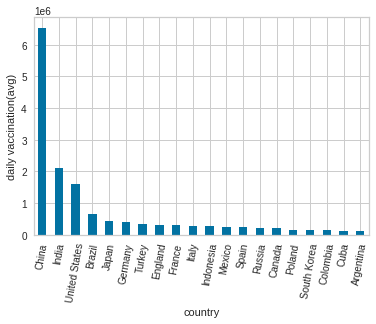

In [12]:
ax = group_country_daily.plot.bar(x = 'country', rot = 80)
ax.set_ylabel('daily vaccination(avg)');

<span style="color:#ae34eb">top 20 countries based on percent of vaccinated people</span>

In [13]:
data.groupby("country")["people_vaccinated_per_hundred"].mean().sort_values(ascending = False).head(20)

country
Gibraltar           52.336574
Israel              50.846555
Aruba               46.208412
Malta               43.264042
Wales               42.783288
Maldives            42.661543
Curacao             42.331843
Pitcairn            42.083980
Bhutan              41.890810
Isle of Man         38.686514
Uruguay             37.343381
Scotland            37.251944
England             36.848342
Northern Ireland    36.489440
Bahrain             32.762136
Chile               32.356915
Mongolia            31.780052
Qatar               30.920724
United States       30.119753
San Marino          30.097681
Name: people_vaccinated_per_hundred, dtype: float64

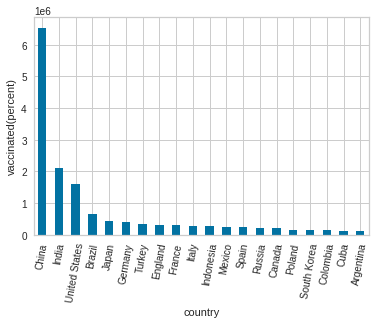

In [14]:
ax = group_country_daily.plot.bar(x = 'country', rot = 80)
ax.set_ylabel('vaccinated(percent)');

In [15]:
type(data['vaccines'][0])

str

In [16]:
len(data['vaccines'])

31025

<span style="color:#ae34eb">which vaccines used in each country</span>

In [17]:
country_vaccine = dict()
for i in range(len(data['vaccines'])):
  vacc_lst = data['vaccines'][i].split(', ')
  if data['country'][i] in country_vaccine:
    country_vaccine[data['country'][i]] = list(set(vacc_lst + country_vaccine[data['country'][i]]))
  else:
    country_vaccine[data['country'][i]] = vacc_lst
for k, v in country_vaccine.items():
  print(k, v)

Afghanistan ['Johnson&Johnson', 'Sinopharm/Beijing', 'Oxford/AstraZeneca', 'Pfizer/BioNTech']
Albania ['Sputnik V', 'Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sinovac']
Algeria ['Oxford/AstraZeneca', 'Sputnik V']
Andorra ['Oxford/AstraZeneca', 'Pfizer/BioNTech']
Angola ['Oxford/AstraZeneca']
Anguilla ['Oxford/AstraZeneca']
Antigua and Barbuda ['Oxford/AstraZeneca']
Argentina ['Sinopharm/Beijing', 'Oxford/AstraZeneca', 'Sputnik V']
Armenia ['Sputnik V', 'Oxford/AstraZeneca', 'Sinovac']
Aruba ['Pfizer/BioNTech']
Australia ['Oxford/AstraZeneca', 'Pfizer/BioNTech']
Austria ['Johnson&Johnson', 'Oxford/AstraZeneca', 'Moderna', 'Pfizer/BioNTech']
Azerbaijan ['Sputnik V', 'Oxford/AstraZeneca', 'Sinovac']
Bahamas ['Oxford/AstraZeneca']
Bahrain ['Sinopharm/Beijing', 'Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sputnik V']
Bangladesh ['Sinopharm/Beijing', 'Oxford/AstraZeneca', 'Pfizer/BioNTech']
Barbados ['Oxford/AstraZeneca']
Belarus ['Sinopharm/Beijing', 'Sputnik V']
Belgium ['Johnson&Johnson', 'Ox

In [18]:
# data.to_csv('/content/drive/MyDrive/Project 1 - Covid Vaccination/Project 1 - Covid Vaccination/country_vaccinations.csv')

In [19]:
type(data['total_vaccinations'][0])

numpy.float64

In [20]:
data2 = data.copy()
data2['total_vaccinations'] = data2['total_vaccinations'].fillna(0)

<span style="color:#ae34eb">sorting vaccines based on number of injections</span>

In [21]:
vaccine_num = dict()
for i in range(len(data['vaccines'])):
  lst = data2['vaccines'][i].split(', ')
  for j in lst:
    if i == len(data['vaccines']) - 1:
      vaccine_num[j] = data2['total_vaccinations'][i]
    elif data2['country'][i] != data2['country'][i + 1]:
      vaccine_num[j] = data2['total_vaccinations'][i]
lst_vaccine_num = vaccine_num.items()
lst_vaccine_num = sorted(lst_vaccine_num, key=lambda x: x[1], reverse=True)
lst_vaccine_num

[('Johnson&Johnson', 336054953.0),
 ('CanSino', 21660650.0),
 ('Sinopharm/Wuhan', 16194526.0),
 ('Abdala', 7900105.0),
 ('Soberana02', 7900105.0),
 ('QazVac', 7303180.0),
 ('Sinopharm/HayatVax', 7303180.0),
 ('Sinovac', 4458461.0),
 ('Pfizer/BioNTech', 4171221.0),
 ('Moderna', 4171221.0),
 ('Sputnik V', 4000000.0),
 ('RBD-Dimer', 3541442.0),
 ('Sinopharm/Beijing', 1666862.0),
 ('Covaxin', 826642.0),
 ('Oxford/AstraZeneca', 243818.0),
 ('EpiVacCorona', 41993.0)]

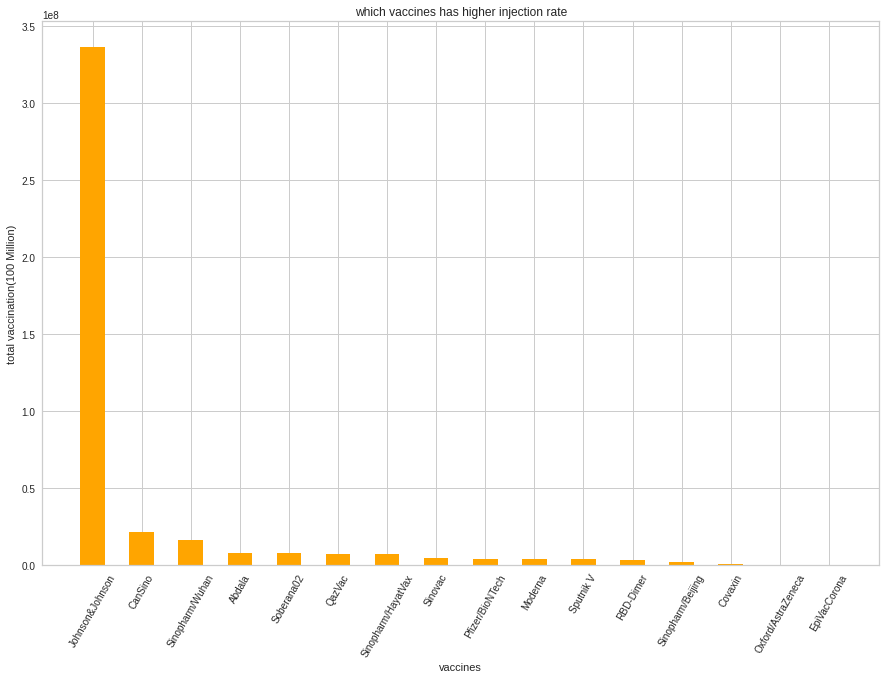

In [22]:
vaccine_name = [lst[0] for lst in lst_vaccine_num]
vaccinated = [lst[1] for lst in lst_vaccine_num]

fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(vaccine_name, vaccinated, color ='Orange', width = 0.5)
plt.xticks(rotation=60)
plt.rcParams.update({'font.size': 11})
plt.xlabel("vaccines")
plt.ylabel("total vaccination(100 Million)")
plt.title("which vaccines has higher injection rate")
plt.show()

<span style="color:#ae34eb">sorting countries based on number of vaccinated people</span>

In [23]:
country_num = dict()
for i in range(len(data['country'])):
  lst = data2['country'][i].split(', ')
  for j in lst:
    if i == len(data['country']) - 1:
      country_num[j] = data2['total_vaccinations'][i]
    elif data2['country'][i] != data2['country'][i + 1]:
      country_num[j] = data2['total_vaccinations'][i]
lst_country_num = country_num.items()
lst_country_num = sorted(lst_country_num, key=lambda x: x[1], reverse=True)
lst_country_num

[('China', 1426347000.0),
 ('India', 391340491.0),
 ('United States', 336054953.0),
 ('Brazil', 120873006.0),
 ('Germany', 84989850.0),
 ('England', 68474146.0),
 ('Japan', 66714528.0),
 ('France', 63174862.0),
 ('Turkey', 62378829.0),
 ('Italy', 59985343.0),
 ('Indonesia', 55819781.0),
 ('Mexico', 52704960.0),
 ('Russia', 50383638.0),
 ('Spain', 50239048.0),
 ('Canada', 44293659.0),
 ('Poland', 32413199.0),
 ('Argentina', 26134815.0),
 ('Chile', 24248545.0),
 ('Colombia', 22942717.0),
 ('Pakistan', 21660650.0),
 ('Saudi Arabia', 21556314.0),
 ('South Korea', 21157612.0),
 ('Morocco', 20794848.0),
 ('Netherlands', 18273238.0),
 ('United Arab Emirates', 16194526.0),
 ('Philippines', 14074514.0),
 ('Thailand', 13533717.0),
 ('Malaysia', 13215121.0),
 ('Belgium', 12700513.0),
 ('Israel', 10959646.0),
 ('Portugal', 10579259.0),
 ('Bangladesh', 10108224.0),
 ('Peru', 9954429.0),
 ('Australia', 9631807.0),
 ('Greece', 9560592.0),
 ('Sweden', 9536164.0),
 ('Cambodia', 9453858.0),
 ('Czechia',

<span style="color:#ae34eb">top 15 countries based on number of vaccinated people</span>

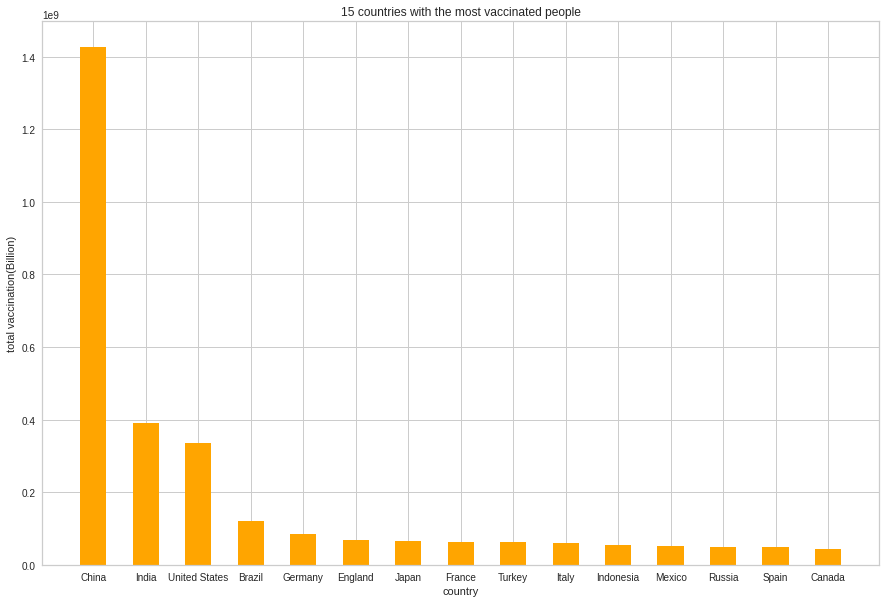

In [24]:
country_name = [lst[0] for lst in lst_country_num][:15]
vaccinated = [lst[1] for lst in lst_country_num][:15]

fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(country_name, vaccinated, color ='Orange', width = 0.5)
# plt.xticks(rotation=60)
plt.rcParams.update({'font.size': 11})
plt.xlabel("country")
plt.ylabel("total vaccination(Billion)")
plt.title("15 countries with the most vaccinated people")
plt.show()

<span style="color:#ae34eb">sorting countries based on number of fully-vaccinated people</span>

In [25]:
fully_num = dict()
for i in range(len(data['country'])):
  lst = data2['country'][i].split(', ')
  for j in lst:
    if i == len(data['country']) - 1:
      fully_num[j] = data2['people_fully_vaccinated'][i]
    elif data2['country'][i] != data2['country'][i + 1]:
      fully_num[j] = data2['people_fully_vaccinated'][i]
lst_fully_num = fully_num.items()
lst_fully_num = sorted(lst_fully_num, key=lambda x: x[1], reverse=True)
lst_fully_num

[('United States', 160408538.0),
 ('India', 77810989.0),
 ('Germany', 37713915.0),
 ('Brazil', 33296719.0),
 ('England', 29747505.0),
 ('France', 27070389.0),
 ('Japan', 25765094.0),
 ('Italy', 25015759.0),
 ('Spain', 23372796.0),
 ('Mexico', 21274238.0),
 ('Turkey', 20013130.0),
 ('Russia', 19844793.0),
 ('Canada', 17901260.0),
 ('Poland', 15907199.0),
 ('Indonesia', 15876777.0),
 ('Chile', 11438183.0),
 ('Colombia', 9876044.0),
 ('Morocco', 9608887.0),
 ('Netherlands', 7419262.0),
 ('United Arab Emirates', 6705685.0),
 ('South Korea', 6326705.0),
 ('Belgium', 5292222.0),
 ('Hungary', 5268814.0),
 ('Israel', 5218807.0),
 ('Argentina', 5148894.0),
 ('Romania', 4706326.0),
 ('Portugal', 4533461.0),
 ('Greece', 4486033.0),
 ('Pakistan', 4323805.0),
 ('Bangladesh', 4284959.0),
 ('Malaysia', 4174882.0),
 ('Czechia', 4106181.0),
 ('Philippines', 4047792.0),
 ('Cambodia', 4036510.0),
 ('Austria', 3926213.0),
 ('Peru', 3746371.0),
 ('Sweden', 3716260.0),
 ('Dominican Republic', 3657968.0),
 (

<span style="color:#ae34eb">top 15 countries based on number of fully-vaccinated people</span>

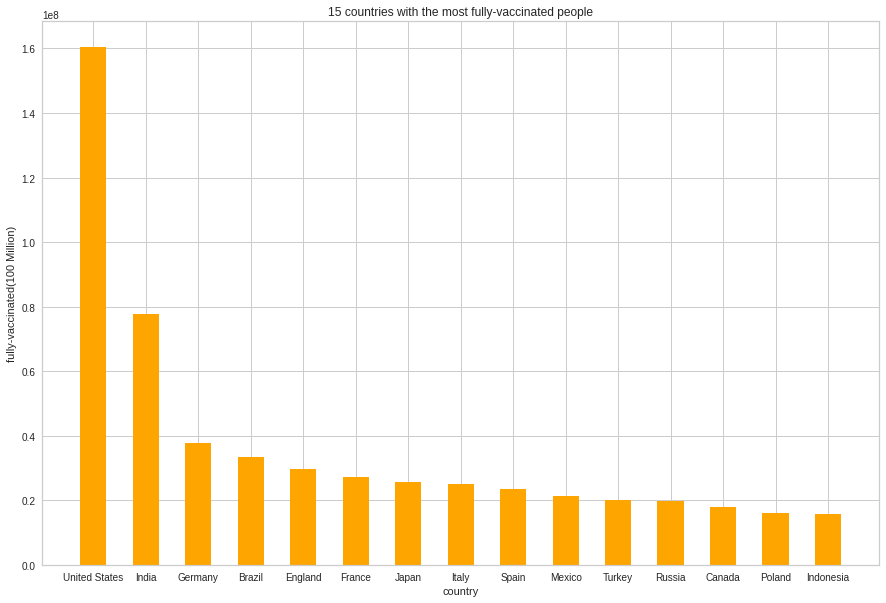

In [26]:
country_name = [lst[0] for lst in lst_fully_num][:15]
vaccinated = [lst[1] for lst in lst_fully_num][:15]

fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(country_name, vaccinated, color ='Orange', width = 0.5)
# plt.xticks(rotation=60)
plt.rcParams.update({'font.size': 11})
plt.xlabel("country")
plt.ylabel("fully-vaccinated(100 Million)")
plt.title("15 countries with the most fully-vaccinated people")
plt.show()

<span style="color:#ae34eb">monthly vaccination plot</span>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'vaccinated')

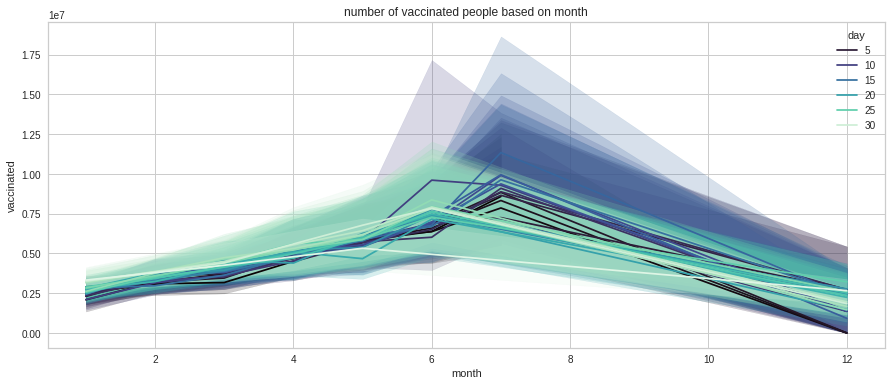

In [27]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(data["month"], data["people_vaccinated"], hue = data["day"], palette = "mako")

ax.set_title("number of vaccinated people based on month")
ax.set_xlabel("month")
ax.set_ylabel("vaccinated")

<span style="color:#ae34eb">monthly fully-vaccination plot</span>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'fully-vaccinated')

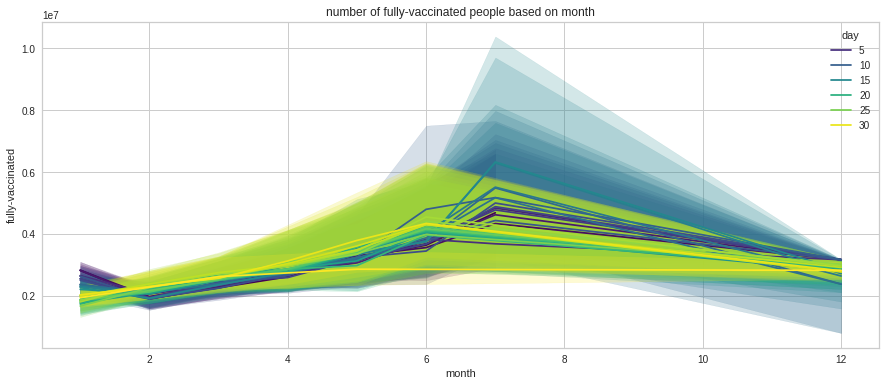

In [28]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(data["month"], data["people_fully_vaccinated"], hue = data["day"], palette = "viridis")

ax.set_title("number of fully-vaccinated people based on month")
ax.set_xlabel("month")
ax.set_ylabel("fully-vaccinated")

<span style="color:#ae34eb">monthly vaccination percent plot</span>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'total vaccinations per hundred')

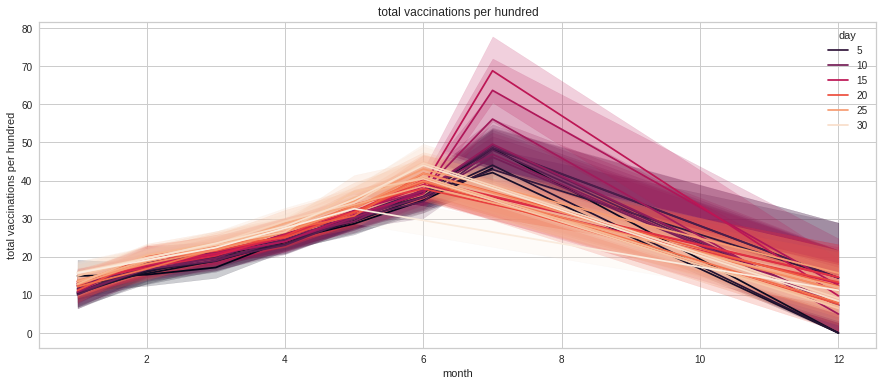

In [29]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(data["month"], data["total_vaccinations_per_hundred"], hue = data["day"], palette = "rocket")

ax.set_title("total vaccinations per hundred")
ax.set_xlabel("month")
ax.set_ylabel("total vaccinations per hundred")

In [30]:
#creating dataframe for top 5 vaccinated countries
x = data.loc[(data.country == "United States") | (data.country == "China") | (data.country == "India") | (data.country == "Brazil") | (data.country == "Germany")]

<span style="color:#ae34eb">comparing top 5 countries based on total vaccination</span>

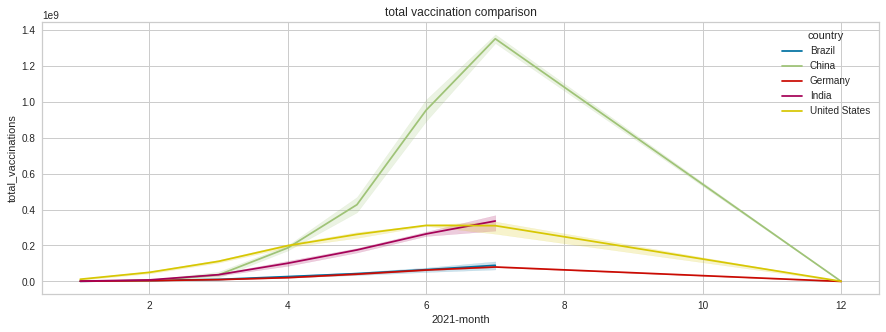

In [31]:
#total vaccination comparison
plt.figure(figsize= (15,5))
sns.lineplot(x = "month", y = "total_vaccinations", data = x, hue = "country")
plt.xlabel("2021-month")
plt.title("total vaccination comparison")
plt.show()

<span style="color:#ae34eb">comparing top 5 countries based on daily vaccination</span>

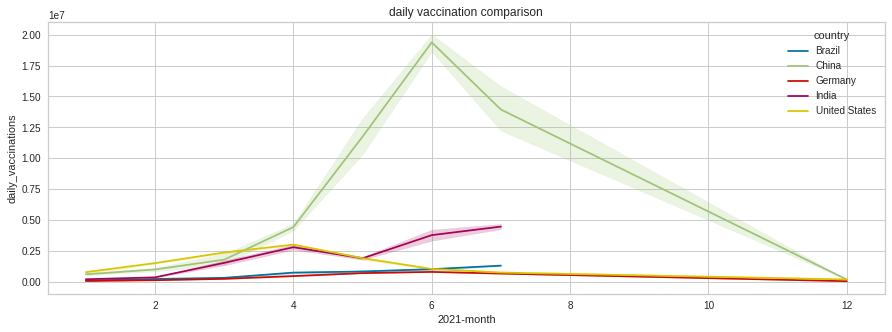

In [32]:
#daily vaccination comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "month",y= "daily_vaccinations" ,data= x,hue= "country")
plt.xlabel("2021-month")
plt.title("daily vaccination comparison")
plt.show()

<span style="color:#ae34eb">daily vaccination progress globally</span>

In [33]:
data3 = data.copy()
fig = px.choropleth(data3, locations = "iso_code", color = "total_vaccinations", hover_name = "country", animation_frame = "date", color_continuous_scale = 'plasma',
                    projection = "natural earth", range_color = [0,5000000], title = "number of vaccinations per country")
fig.show() 

<span style="color:#D35400">**Training and Predicting data for Daily Vaccination**</span>

---



In [34]:
data4 = data.copy()
cols = list(data4.columns.values)
cols.pop(cols.index('daily_vaccinations'))
data4 = data4[cols + ['daily_vaccinations']]
data4

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,day,month,year,daily_vaccinations
0,0,Afghanistan,AFG,02-22-2021,0.0,0.000000e+00,3.160959e+06,0.000000,0.000000,12.247664,3411.314993,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,22,2,2021,113130.988222
1,1,Afghanistan,AFG,02-23-2021,0.0,5.439918e+06,3.160959e+06,28.938003,18.917572,12.247664,35.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,23,2,2021,1367.000000
2,2,Afghanistan,AFG,02-24-2021,0.0,5.439918e+06,3.160959e+06,28.938003,18.917572,12.247664,35.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,24,2,2021,1367.000000
3,3,Afghanistan,AFG,02-25-2021,0.0,5.439918e+06,3.160959e+06,28.938003,18.917572,12.247664,35.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,25,2,2021,1367.000000
4,4,Afghanistan,AFG,02-26-2021,0.0,5.439918e+06,3.160959e+06,28.938003,18.917572,12.247664,35.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,26,2,2021,1367.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31020,31235,Zimbabwe,ZWE,07-11-2021,1491397.0,8.959800e+05,5.954170e+05,10.030000,6.030000,4.010000,1251.000000,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,11,7,2021,18598.000000
31021,31236,Zimbabwe,ZWE,07-12-2021,1531868.0,9.263120e+05,6.055560e+05,10.310000,6.230000,4.070000,1561.000000,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,12,7,2021,23205.000000
31022,31237,Zimbabwe,ZWE,07-13-2021,1575539.0,9.556560e+05,6.198830e+05,10.600000,6.430000,4.170000,1855.000000,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,13,7,2021,27567.000000
31023,31238,Zimbabwe,ZWE,07-14-2021,1613640.0,9.887460e+05,6.248940e+05,10.860000,6.650000,4.200000,2065.000000,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,14,7,2021,30698.000000


In [35]:
X = pd.DataFrame(data4.iloc[:, :-1].values)
y = data4.iloc[:, -1].values

<span style="color:#329ca8">Enconding String Data to Numbers for Training</span>

In [36]:
cols = [2, 11, 12, 13]
#
# Encode labels of multiple columns at once
#
X[cols] = X[cols].apply(LabelEncoder().fit_transform)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,Afghanistan,1,02-22-2021,0,0,3.16096e+06,0,0,12.2477,3411.31,17,91,28,22,2,2021
1,1,Afghanistan,1,02-23-2021,0,5.43992e+06,3.16096e+06,28.938,18.9176,12.2477,35,17,91,28,23,2,2021
2,2,Afghanistan,1,02-24-2021,0,5.43992e+06,3.16096e+06,28.938,18.9176,12.2477,35,17,91,28,24,2,2021
3,3,Afghanistan,1,02-25-2021,0,5.43992e+06,3.16096e+06,28.938,18.9176,12.2477,35,17,91,28,25,2,2021
4,4,Afghanistan,1,02-26-2021,0,5.43992e+06,3.16096e+06,28.938,18.9176,12.2477,35,17,91,28,26,2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31020,31235,Zimbabwe,216,07-11-2021,1.4914e+06,895980,595417,10.03,6.03,4.01,1251,50,56,81,11,7,2021
31021,31236,Zimbabwe,216,07-12-2021,1.53187e+06,926312,605556,10.31,6.23,4.07,1561,50,56,81,12,7,2021
31022,31237,Zimbabwe,216,07-13-2021,1.57554e+06,955656,619883,10.6,6.43,4.17,1855,50,56,81,13,7,2021
31023,31238,Zimbabwe,216,07-14-2021,1.61364e+06,988746,624894,10.86,6.65,4.2,2065,50,56,81,14,7,2021


<span style="color:#329ca8">Scaling Data using Standard Scaler</span>

In [37]:
#scaling data in order to use in linear regression
sc = StandardScaler()
X.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]] = sc.fit_transform(X.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]])

<span style="color:#329ca8">Finding Most effective Features using Heatmap</span>

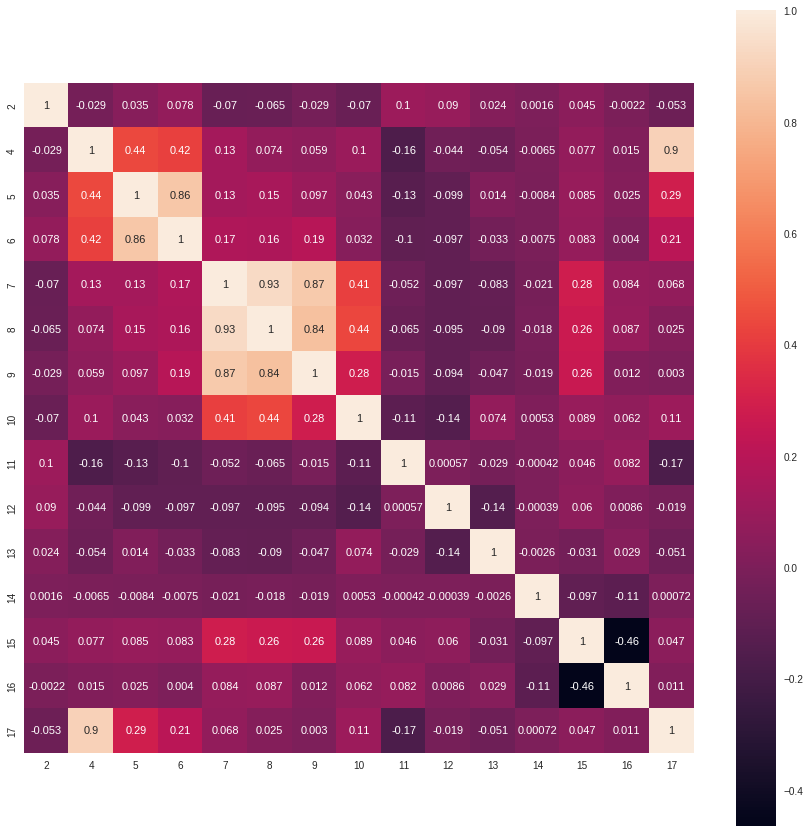

In [38]:
plt.subplots(figsize=(15, 15))
test = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis = 1, ignore_index=True)
sns.heatmap(test.corr(), annot=True, square=True)
plt.show()

In [39]:
# X = X[[2, 4, 5, 6, 7, 10, 11, 13]]
# X = X[[2, 7, 8, 9, 11, 12, 13, 14]]

In [40]:
X = X.iloc[:, 1:].values
X = pd.DataFrame(X)

<span style="color:#329ca8">Dropping Data with less Effect</span>

In [41]:
X.drop(15, inplace = True, axis = 1) # year
X.drop(13, inplace = True, axis = 1) # day
X.drop(11, inplace = True, axis = 1) # source name
X.drop(8, inplace = True, axis = 1)  # total_vaccinations_per_hundred
X.drop(2, inplace = True, axis = 1)  # splited date into year, month, day so the column can be dropped
X.drop(0, inplace = True, axis = 1)  # country name

<span style="color:#329ca8">Spliting Data into Train and Test</span>

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

<span style="color:#ae34eb">quadratic regression leads to overfitting(R^2=0.99) <br>also hear linear is better than ridge regression</span>

In [43]:
# Create a Linear regressor
mlr = LinearRegression()

# # Train the model using the training sets 
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_train)

# clf = Ridge(alpha=0.05)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_train)
# "Creates a polynomial regression model for the given degree"
# poly_features = PolynomialFeatures(degree=2)
   
# # transform the features to higher degree features.
# X_train_quadratic = poly_features.fit_transform(X_train)
# # fit the transformed features to Linear Regression
# quadratic = LinearRegression()
# quadratic.fit(X_train_quadratic, y_train)
# # predicting on training data-set
# y_pred = quadratic.predict(X_train_quadratic)   
# # predicting on test data-set
# y_pred2 = quadratic.predict(poly_features.fit_transform(X_test))

<span style="color:#329ca8">Evaluating Model using Coefficient of Determination</span>

In [44]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.8427863345809967
MAE: 72965.09577377776
MSE: 104026351411.96783
RMSE: 322531.1634741174


In [45]:
y_pred2 = mlr.predict(X_test)
print('R^2:',metrics.r2_score(y_test, y_pred2))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:',metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

R^2: 0.8612206420906707
MAE: 76588.97832076026
MSE: 127672478110.61758
RMSE: 357312.8574661393


<span style="color:#D35400">**Metrics Plots**</span>

---



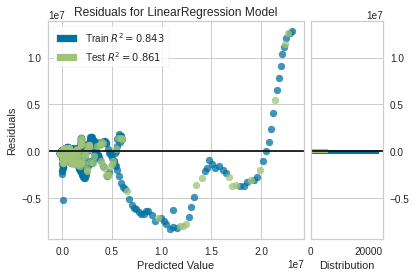

In [46]:
visualizer = ResidualsPlot(mlr)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

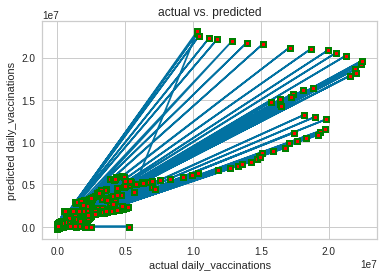

In [47]:
plt.errorbar(y_train, y_pred, marker='s', mfc='red', mec='green', ms = 5, mew = 2)
plt.xlabel("actual daily_vaccinations")
plt.ylabel("predicted daily_vaccinations")
plt.title("actual vs. predicted")
plt.show()

<span style="color:#329ca8">**for Train**</span>

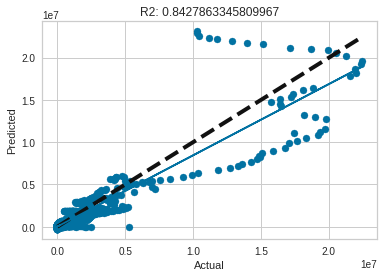

In [48]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_train, y_predicted = y_train.reshape(-1,1), y_pred.reshape(-1,1)
ax.plot(y_train, mlr.fit(y_train, y_pred).predict(y_train))
ax.set_title('R2: ' + str(r2_score(y_train, y_pred)))
plt.show()

<span style="color:#329ca8">calculating Squared Error</span>



In [49]:
def sqr_err(y_true, y_pred):
    """

    :param y_true: true values of y
    :param y_pred: predicted values of y
    :return: array of lenght original data containing mean squared error for each predictions
    """
    if len(y_true) != len(y_pred):
        raise IndexError("Mismathced array sizes, you inputted arrays with sizes {} and {}".format(len(y_true), len(y_pred)))
    else:
        length = len(y_true)

    sqrerror_out = [(y_pred[i]-y_true[i])**2 for i in range(length)]

    return np.array(sqrerror_out)

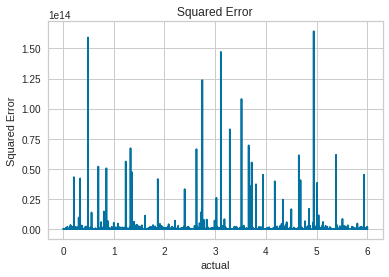

In [50]:
theta_value = np.linspace(0, 6, 24820)

Squared_error = sqr_err(y_train, y_pred)

plt.figure()
plt.plot(theta_value, Squared_error)
plt.xlabel('actual')
plt.ylabel('Squared Error')
plt.title('Squared Error')
plt.show()

<span style="color:#329ca8">**for Test**</span>

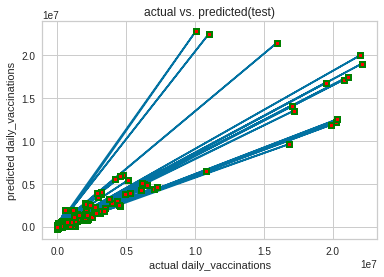

In [51]:
plt.errorbar(y_test, y_pred2, marker='s', mfc='red', mec='green', ms = 5, mew = 2)
plt.xlabel("actual daily_vaccinations")
plt.ylabel("predicted daily_vaccinations")
plt.title("actual vs. predicted(test)")
plt.show()

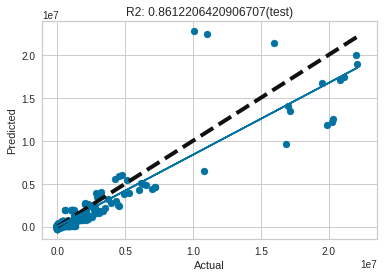

In [52]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred2)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test, y_pred2 = y_test.reshape(-1,1), y_pred2.reshape(-1,1)
ax.plot(y_test, mlr.fit(y_test, y_pred2).predict(y_test))
ax.set_title('R2: ' + str(r2_score(y_test, y_pred2)) + '(test)')
plt.show()

<span style="color:#329ca8">calculating Squared Error for test</span>

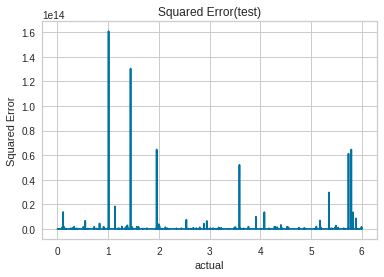

In [53]:
theta_value = np.linspace(0, 6, 6205)

Squared_error = sqr_err(y_test, y_pred2)

plt.figure()
plt.plot(theta_value, Squared_error)
plt.xlabel('actual')
plt.ylabel('Squared Error')
plt.title('Squared Error(test)')
plt.show()

<span style="color:#D35400">**Saving Model**</span>

---



In [54]:
filename = '/content/drive/MyDrive/Project 1 - Covid Vaccination/Project 1 - Covid Vaccination/finalized_model.sav'
pickle.dump(mlr, open(filename, 'wb'))